<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_Final_AP_Aut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)


Cargamos dataset

In [2]:
df=pd.read_excel('HISTORICO_SUERTES.xlsx')

Tamaño dataset

In [3]:
df.shape

(21027, 85)

primeras filas

In [4]:
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Últimas filas

In [5]:
df.tail()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9
21026,202407,80124,SANTA LUCIA,IP02,11.0,001,CORINTIAS,2.22,1.1,CC05-430,...,78.687,17.8,30.890,NaN,459.274,444.372,119.8,1041.6,532.5,1881.2


In [73]:
df = df[(df["Período"] >= 202202)]

Descripción general de columnas

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7148 entries, 13879 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    7148 non-null   int64         
 1   Hacienda                   7148 non-null   int64         
 2   Nombre                     7148 non-null   object        
 3   Zona                       7148 non-null   object        
 4   Tenencia                   7148 non-null   float64       
 5   Suerte                     7148 non-null   object        
 6   Suelo                      6085 non-null   object        
 7   Area Neta                  7148 non-null   float64       
 8   Dist Km                    7148 non-null   float64       
 9   Variedad                   7148 non-null   object        
 10  Cod.Estado #               7148 non-null   int64         
 11  Cod.Estado                 7148 non-null   object        
 12  F.Siem

Descripción detallada de columnas del dataset

In [75]:
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,7148.000000,7148.00000,7148.000000,7148.000000,7148.000000,7148.000000,7148,2659,7148.000000,7148,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202288.486570,80707.37437,43.311276,9.031959,22.651847,4.337997,2017-07-06 11:16:41.231113472,2023-02-10 10:26:34.885295104,12.838651,2023-04-16 12:37:52.411863552,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,202202.000000,80100.00000,11.000000,0.006000,1.100000,0.000000,1994-06-25 00:00:00,2021-01-30 00:00:00,6.210000,2022-01-31 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,202209.000000,80171.00000,31.000000,3.567500,10.000000,2.000000,2015-08-20 06:00:00,2022-06-13 12:00:00,11.790000,2022-09-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202304.000000,80435.00000,51.000000,7.485000,20.000000,3.000000,2018-07-28 00:00:00,2023-02-18 00:00:00,12.350000,2023-04-20 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202311.000000,81112.00000,51.000000,12.520000,30.500000,6.000000,2020-03-14 00:00:00,2023-09-25 12:00:00,13.400000,2023-11-02 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.00000,91.000000,65.000000,99.300000,28.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,33.220000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,72.628354,668.59273,22.447677,7.180645,16.362350,3.888782,NaN,NaN,2.111765,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


Revisamos Nulos

In [76]:
df.isnull().sum()

,0
Período,0
Hacienda,0
Nombre,0
Zona,0
Tenencia,0
...,...
Radiacion Solar Ciclo,2618
Precipitacion 0_3,2618
Precipitacion Ciclo,2618
Evaporacion 0-3,2618


% Part. nullos

In [77]:
df.isnull().mean()*100

,0
Período,0.00000
Hacienda,0.00000
Nombre,0.00000
Zona,0.00000
Tenencia,0.00000
...,...
Radiacion Solar Ciclo,36.62563
Precipitacion 0_3,36.62563
Precipitacion Ciclo,36.62563
Evaporacion 0-3,36.62563


Revisar duplicados

In [78]:
df.duplicated().sum()

np.int64(0)

Conteo columba categórica

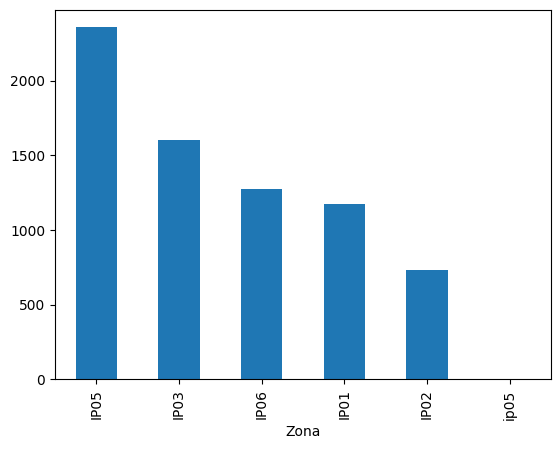

In [79]:
## para categórica

df['Zona'].value_counts().plot(kind='bar')
plt.show()

Ver qué columnas son categóricas

In [80]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']


Sacamos una base solo con categóricas

In [81]:
df_Cat=df[['TCH', 'Zona','Cultivo', 'Tipo Quema']]
df_Cat.head()

,TCH,Zona,Cultivo,Tipo Quema
13879,181.763812,IP06,Normal,VERDE
13880,150.130932,IP03,Normal,Q.ACCIDENTAL
13881,146.899848,IP05,Normal,VERDE
13882,100.193089,IP06,Normal,Q.ACCIDENTAL
13883,188.246003,IP03,Normal,Q.ACCIDENTAL


In [82]:
import numpy as np
import pandas as pd

def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
                      for c in np.unique(cats)])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

# Ejemplo: TCH (continua) vs Ciudad (categórica)
eta = correlation_ratio(df_Cat["Zona"], df_Cat["TCH"])
print("Correlation ratio (eta):", eta)

Correlation ratio (eta): 0.2189475036097049


In [83]:
import numpy as np
import pandas as pd
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "TCH"

# Seleccionar categóricas (object o category) que están presentes en df_Cat
cat_cols = df_Cat.select_dtypes(include=["object", "category"]).columns.tolist()


# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df_Cat[col], df_Cat[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient="index", columns=["Cramers_V"])
cramer_df = cramer_df.sort_values(by="Cramers_V", ascending=False)

print(cramer_df)

            Cramers_V
Tipo Quema   0.021108
Zona         0.018474
Cultivo      0.015579


In [84]:
# Función correlation ratio (η)
def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([
        len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
        for c in np.unique(cats)
    ])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

# Variable continua
target = "TCH"

# Seleccionar categóricas (object / category)
cat_cols = df_Cat.select_dtypes(include=["object", "category"]).columns.tolist()
print("Variables categóricas detectadas:", cat_cols)

# Guardar resultados
eta_results = {}
for col in cat_cols:
    eta_results[col] = correlation_ratio(df_Cat[col], df_Cat[target])

# DataFrame ordenado
eta_df = pd.DataFrame.from_dict(eta_results, orient="index", columns=["eta"])
eta_df = eta_df.sort_values(by="eta", ascending=False)

print(eta_df)

Variables categóricas detectadas: ['Zona', 'Cultivo', 'Tipo Quema']
                 eta
Zona        0.218948
Tipo Quema  0.155545
Cultivo     0.073007


In [85]:
cat_vars=["Zona","Cultivo","Tipo Quema"]

df_encoded = pd.get_dummies(df_Cat, columns=cat_vars, drop_first=True)
df_encoded.head()

,TCH,Zona_IP02,Zona_IP03,Zona_IP05,Zona_IP06,Zona_ip05,Cultivo_Organico,Tipo Quema_Q.ACCIDENTAL,Tipo Quema_Q.PROGRAMADA,Tipo Quema_SEMILLA,Tipo Quema_VERDE
13879,181.763812,False,False,False,True,False,False,False,False,False,True
13880,150.130932,False,True,False,False,False,False,True,False,False,False
13881,146.899848,False,False,True,False,False,False,False,False,False,True
13882,100.193089,False,False,False,True,False,False,True,False,False,False
13883,188.246003,False,True,False,False,False,False,True,False,False,False


Vamos a revisar significancia de categóricas

In [86]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "TCH"

# Seleccionar categóricas (object o category)
cat_cols = df_encoded.select_dtypes(include=['object','category']).columns

# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df[col], df[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Cramers_V'])
cramer_df = cramer_df.sort_values(by='Cramers_V', ascending=False)

print(cramer_df)

Empty DataFrame
Columns: [Cramers_V]
Index: []


Separar columnas númericas para correr correlaciones

In [87]:
df_numericas = df.select_dtypes(include=[np.number])
df_numericas.head()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
13879,202202,80170,31.0,7.24,19.0,7,15.38,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13880,202202,80714,81.0,11.80,28.0,2,14.98,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13881,202202,81291,51.0,13.18,18.1,8,13.63,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13882,202202,80242,31.0,2.46,12.6,3,9.59,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13883,202202,80163,31.0,5.63,14.7,0,15.57,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_num=df_numericas

Correlaciones

In [89]:
### Ver si lo quitamos

corr=df_numericas.corr().sort_values('TCH', ascending=False)
print (corr)

                            Período  Hacienda  Tenencia  Area Neta   Dist Km  \
TCH                       -0.125541 -0.044608 -0.022693   0.116469 -0.089433   
TCHM                       0.013109 -0.055090 -0.075577   0.120858 -0.145316   
KATRHM                     0.018325 -0.011817 -0.022528   0.156871 -0.099451   
TAH                       -0.117484  0.032747  0.074109   0.163284 -0.005502   
TAHM                       0.002232  0.031222  0.046397   0.183141 -0.046568   
...                             ...       ...       ...        ...       ...   
%Sac.Caña                  0.005442  0.130918  0.122476   0.106356  0.156771   
%ATR                       0.019200  0.133974  0.152751   0.082078  0.164949   
Fert.Nitrogen.                  NaN       NaN       NaN        NaN       NaN   
Urea 46%                        NaN       NaN       NaN        NaN       NaN   
Sum Oscilacion Temp Ciclo       NaN       NaN       NaN        NaN       NaN   

                           Cod.Estado #

In [90]:
## ver si lo quitamos

# Aplanar matriz y ordenar
corr_ord = corr.unstack().sort_values(ascending=False)

# Quitar la diagonal (correlación = 1.0) y duplicados
corr_filtrada = corr_ord[corr_ord < 1].drop_duplicates()

# Mostrar las 20 más fuertes
print(corr_filtrada.head(20))

TonUltCorte          Ton.Azucar              0.984078
%ATR                 %Sac.Caña               0.983290
KATRHM               TAHM                    0.983012
Pureza               Brix                    0.976210
Rdto                 %Sac.Caña               0.975459
NITO_XTEND           Edad.Precosecha         0.975070
Edad.Precosecha      Evaporacion Ciclo       0.968729
Brix                 %Sac.Muestreadora       0.967552
Rdto                 %Sac.Muestreadora       0.966640
%ATR                 Rdto                    0.952581
Area Neta            TonUltCorte             0.948536
Ton.Azucar           Area Neta               0.945365
%Sac.Caña            %Sac.Muestreadora       0.943251
%ATR                 %Sac.Muestreadora       0.942724
KATRHM               TCHM                    0.936908
Edad.Precosecha      Semanas mad.            0.925984
TAH                  TAHM                    0.895727
Lluvias Ciclo        Lluvias seis a nueve    0.882364
Pureza               %Sac.Mu

In [91]:
# Calcular correlaciones con churn y ordenarlas
df_numericas = df.corr(numeric_only=True)['TCH'].sort_values(ascending=False)

# Mostrar resultado
print(df_numericas)

TCH                          1.000000
TCHM                         0.850454
KATRHM                       0.825486
TAH                          0.824950
TAHM                         0.740011
                               ...   
%Sac.Caña                   -0.189640
%ATR                        -0.198731
Fert.Nitrogen.                    NaN
Urea 46%                          NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, Length: 67, dtype: float64


In [92]:
corr_df = df_numericas.reset_index()
corr_df.columns = ['Variable', 'Correlacion_con_TCH']
corr_df

,Variable,Correlacion_con_TCH
0,TCH,1.000000
1,TCHM,0.850454
2,KATRHM,0.825486
3,TAH,0.824950
4,TAHM,0.740011
...,...,...
62,%Sac.Caña,-0.189640
63,%ATR,-0.198731
64,Fert.Nitrogen.,NaN
65,Urea 46%,NaN


In [211]:
print(df_numericas.head(20))

TCH                      1.000000
TCHM                     0.850454
KATRHM                   0.825486
TAH                      0.824950
TAHM                     0.740011
TonUltCorte              0.345126
Ton.Azucar               0.314916
Evaporacion Ciclo        0.260934
MicroZinc                0.212576
Evaporacion 0-3          0.185401
Edad Ult Cos             0.176178
Radicion Solar 0-3       0.164893
%Infest.Diatrea          0.143587
M3 Riego                 0.124178
Area Neta                0.116469
Vinaza                   0.115808
Radiacion Solar Ciclo    0.113209
Cod. T.Cultivo           0.072085
Luvias 9 -FC             0.070500
NITO_XTEND               0.053485
Name: TCH, dtype: float64


In [212]:
df_num

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
13879,202202,80170,31.0,7.24,19.0,7,15.38,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13880,202202,80714,81.0,11.80,28.0,2,14.98,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13881,202202,81291,51.0,13.18,18.1,8,13.63,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13882,202202,80242,31.0,2.46,12.6,3,9.59,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13883,202202,80163,31.0,5.63,14.7,0,15.57,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,11.0,3.00,1.8,5,11.63,0,2.0,0.0,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,11.0,1.22,1.8,1,11.89,0,2.0,0.0,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,11.0,1.85,1.8,3,11.89,0,2.0,0.0,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,11.0,31.42,3.5,3,11.70,0,2.0,0.0,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


In [213]:
variables = ['TonUltCorte', 'Ton.Azucar', 'Evaporacion Ciclo', 'MicroZinc', 'Evaporacion 0-3', 'Edad Ult Cos', 'Radicion Solar 0-3', '%Infest.Diatrea', 'M3 Riego', 'Area Neta', 'Vinaza', 'Radiacion Solar Ciclo']

# Conteo de no nulos y nulos por periodo
conteo = (
    df.groupby('Período')[variables]
      .agg([lambda x: x.notna().sum(), lambda x: x.isna().sum()])
)

conteo.columns = [["_".join(col).strip() for col in conteo.columns.values]]
print(conteo)

        TonUltCorte_<lambda_0> TonUltCorte_<lambda_1> Ton.Azucar_<lambda_0>  \
Período                                                                       
202202                     133                      0                    51   
202203                     256                      0                   255   
202204                     233                      0                   233   
202205                     242                      0                   240   
202206                     197                      0                   197   
202207                     268                      0                   266   
202208                     322                      0                   321   
202209                     296                      0                   294   
202210                     251                      0                   250   
202211                     210                      0                   209   
202212                     286                      

Separar de mi dataset mis variables de interés para medición de TCH

In [96]:
##df_i=df[['TCH','TAH','TCHM','KATRHM','TAHM','TonUltCorte','Edad Ult Cos','Ton.Azucar','Evaporacion Ciclo','Evaporacion 0-3','Edad.Precosecha','Radicion Solar 0-3','Luvias 9 -FC']]
##df_i.head()

In [215]:
df_i=df[['TCH','Num.Riegos', 'Evaporacion Ciclo', 'Precipitacion Ciclo', 'Temp. Media Ciclo']]

In [216]:
df_i

,TCH,Num.Riegos,Evaporacion Ciclo,Precipitacion Ciclo,Temp. Media Ciclo
13879,181.763812,10.0,NaN,NaN,NaN
13880,150.130932,NaN,NaN,NaN,NaN
13881,146.899848,NaN,NaN,NaN,NaN
13882,100.193089,5.0,NaN,NaN,NaN
13883,188.246003,13.0,NaN,NaN,NaN
...,...,...,...,...,...
21022,172.446666,13.0,1824.6,1037.8,31.089
21023,108.573770,12.0,1867.2,1041.6,30.945
21024,145.808108,12.0,1867.2,1041.6,30.945
21025,143.638287,7.0,1843.9,1037.8,31.040


In [217]:
df_i.isnull().sum()

,0
TCH,0
Num.Riegos,4493
Evaporacion Ciclo,2618
Precipitacion Ciclo,2618
Temp. Media Ciclo,2618


In [222]:
cols = ['TCH','Num.Riegos', 'Evaporacion Ciclo', 'Precipitacion Ciclo', 'Temp. Media Ciclo']

In [223]:
df_i[cols] = df_i[cols].fillna(df[cols].mean())
print (df_i[cols].isnull().sum())

TCH                    0
Num.Riegos             0
Evaporacion Ciclo      0
Precipitacion Ciclo    0
Temp. Media Ciclo      0
dtype: int64


/tmp/ipython-input-4229492589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i[cols] = df_i[cols].fillna(df[cols].mean())


In [224]:
df_i

,TCH,Num.Riegos,Evaporacion Ciclo,Precipitacion Ciclo,Temp. Media Ciclo
13879,181.763812,10.000000,1912.479868,1209.46298,24.556072
13880,150.130932,9.981544,1912.479868,1209.46298,24.556072
13881,146.899848,9.981544,1912.479868,1209.46298,24.556072
13882,100.193089,5.000000,1912.479868,1209.46298,24.556072
13883,188.246003,13.000000,1912.479868,1209.46298,24.556072
...,...,...,...,...,...
21022,172.446666,13.000000,1824.600000,1037.80000,31.089000
21023,108.573770,12.000000,1867.200000,1041.60000,30.945000
21024,145.808108,12.000000,1867.200000,1041.60000,30.945000
21025,143.638287,7.000000,1843.900000,1037.80000,31.040000


In [225]:
df_i

,TCH,Num.Riegos,Evaporacion Ciclo,Precipitacion Ciclo,Temp. Media Ciclo
13879,181.763812,10.000000,1912.479868,1209.46298,24.556072
13880,150.130932,9.981544,1912.479868,1209.46298,24.556072
13881,146.899848,9.981544,1912.479868,1209.46298,24.556072
13882,100.193089,5.000000,1912.479868,1209.46298,24.556072
13883,188.246003,13.000000,1912.479868,1209.46298,24.556072
...,...,...,...,...,...
21022,172.446666,13.000000,1824.600000,1037.80000,31.089000
21023,108.573770,12.000000,1867.200000,1041.60000,30.945000
21024,145.808108,12.000000,1867.200000,1041.60000,30.945000
21025,143.638287,7.000000,1843.900000,1037.80000,31.040000


In [226]:
df_i

,TCH,Num.Riegos,Evaporacion Ciclo,Precipitacion Ciclo,Temp. Media Ciclo
13879,181.763812,10.000000,1912.479868,1209.46298,24.556072
13880,150.130932,9.981544,1912.479868,1209.46298,24.556072
13881,146.899848,9.981544,1912.479868,1209.46298,24.556072
13882,100.193089,5.000000,1912.479868,1209.46298,24.556072
13883,188.246003,13.000000,1912.479868,1209.46298,24.556072
...,...,...,...,...,...
21022,172.446666,13.000000,1824.600000,1037.80000,31.089000
21023,108.573770,12.000000,1867.200000,1041.60000,30.945000
21024,145.808108,12.000000,1867.200000,1041.60000,30.945000
21025,143.638287,7.000000,1843.900000,1037.80000,31.040000


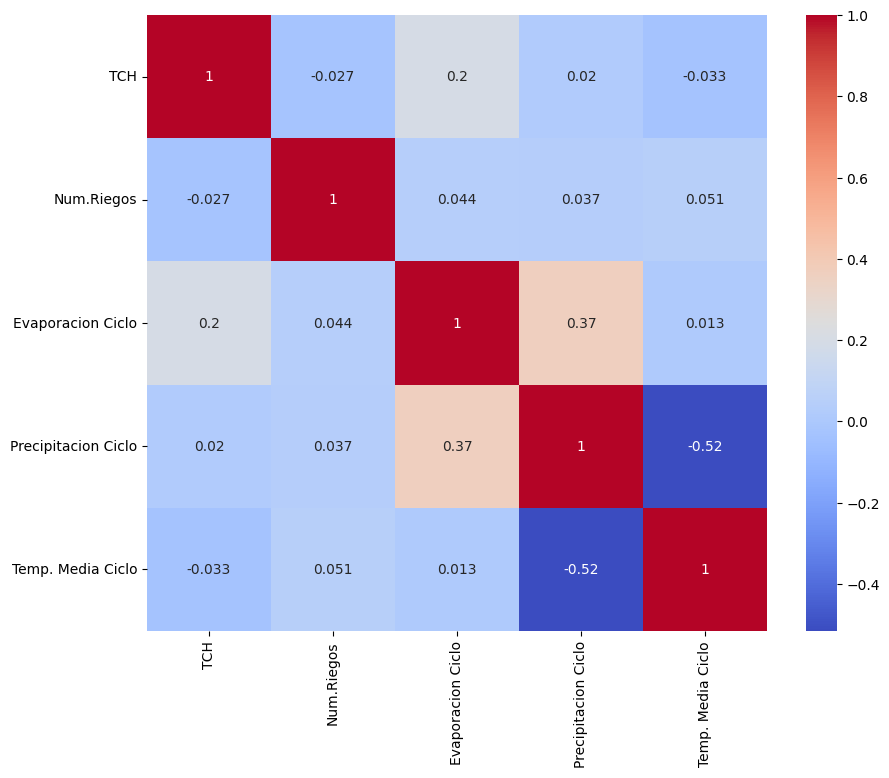

In [227]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_i.corr(), annot=True, cmap='coolwarm')
plt.show()

In [229]:
df_i.describe()

,TCH,Num.Riegos,Evaporacion Ciclo,Precipitacion Ciclo,Temp. Media Ciclo
count,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000
mean,123.552218,9.981544,1912.479868,1209.462980,24.556072
std,31.875980,14.886380,245.165540,271.025049,1.967802
min,3.421052,1.000000,190.400000,23.100000,22.353000
25%,102.873486,8.000000,1823.025000,1102.850000,23.084000
50%,124.626511,9.981544,1912.479868,1209.462980,24.556072
75%,143.871120,9.981544,1946.325000,1237.925000,24.556072
max,287.877500,278.000000,4971.800000,3783.700000,32.358000


Valido nulos en mi dataset de interés

Outliers

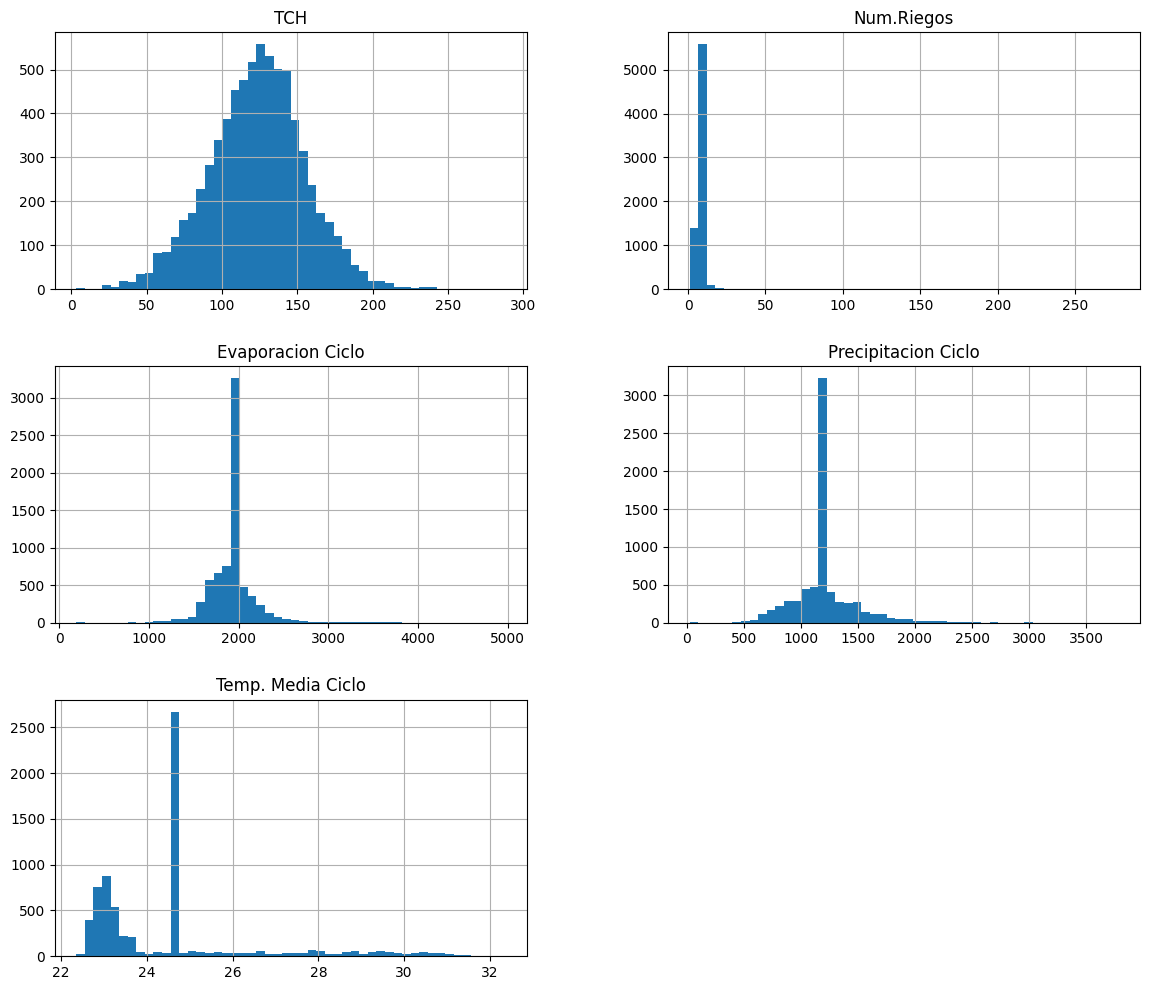

In [230]:
df_i.hist(bins=50,figsize=(14,12))
plt.show()

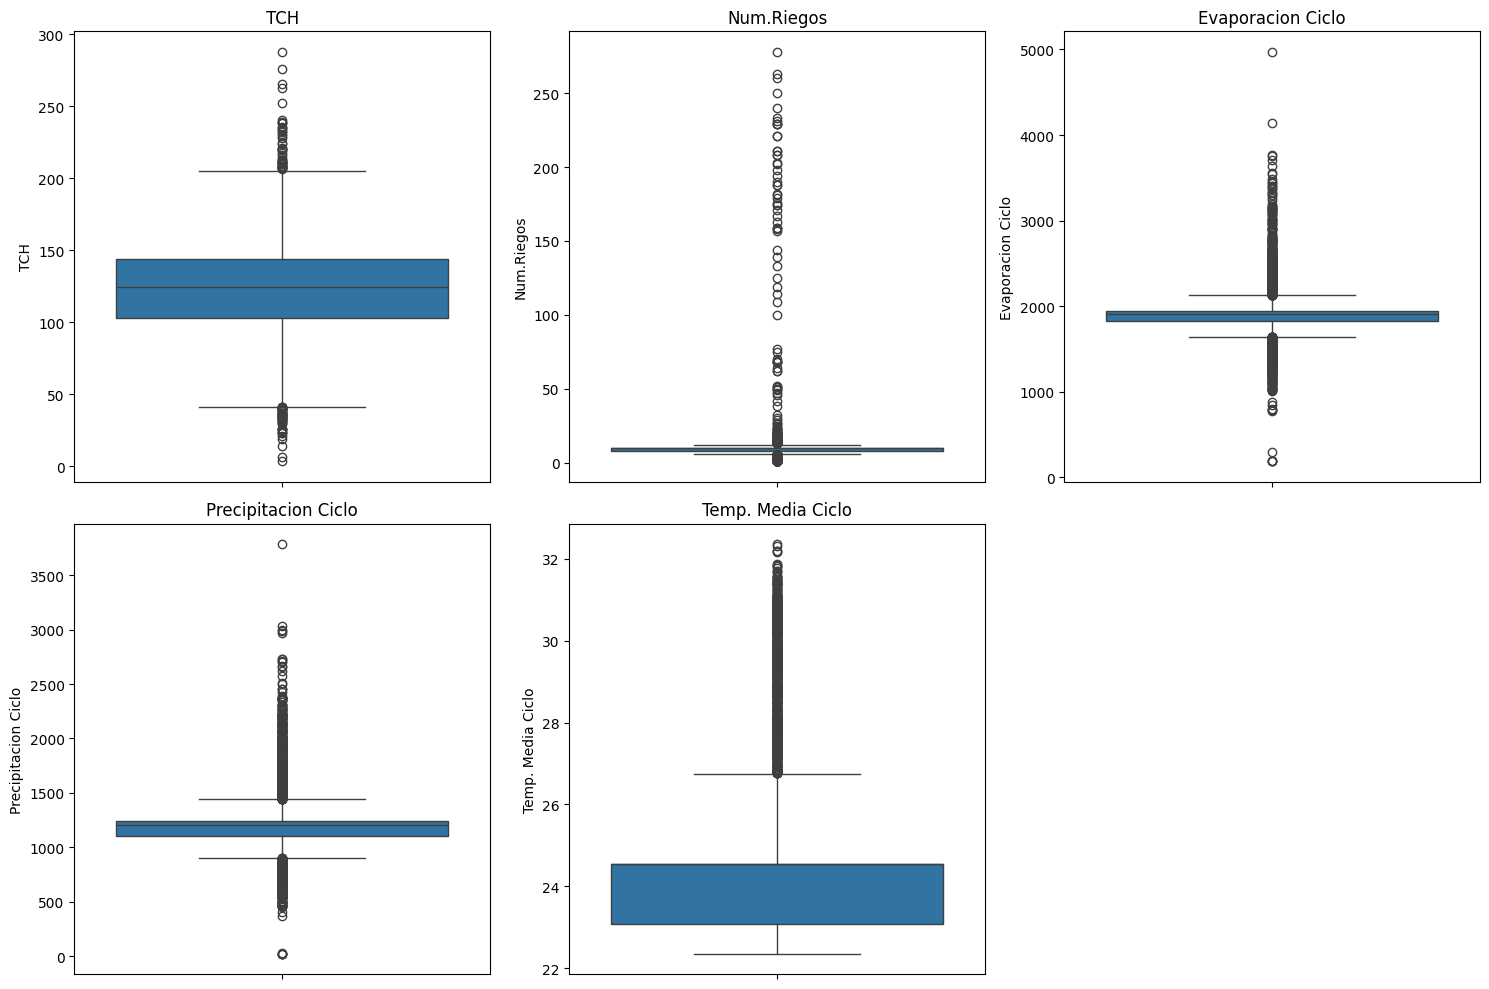

In [231]:
import math

num_cols = df_i.select_dtypes(include=['number']).columns
n = len(num_cols)

# Definir grid
ncols = 3   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_i[col], ax=axes[i])
    axes[i].set_title(col)

# Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

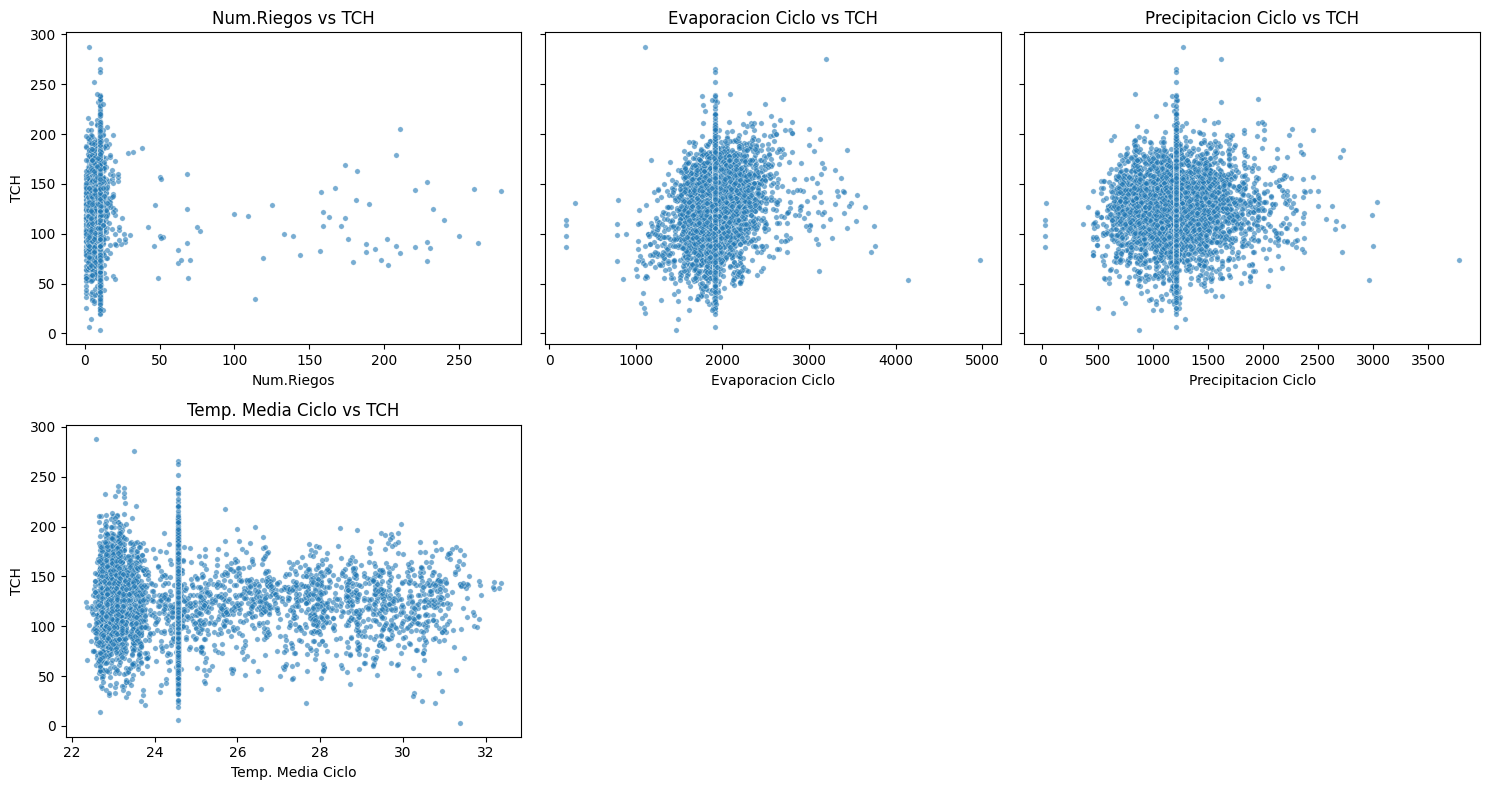

In [232]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

y = "TCH"  # tu variable objetivo en eje Y

# Tomar todas las numéricas excepto Y
x_cols = df_i.select_dtypes(include=['number']).columns.drop(y)

n = len(x_cols)
ncols = 3   # número de gráficos por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_i, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [233]:
df_i.isnull().sum()

,0
TCH,0
Num.Riegos,0
Evaporacion Ciclo,0
Precipitacion Ciclo,0
Temp. Media Ciclo,0


In [177]:
##Eliminar outliers de Edad ult cos

col = ["TCH","TonUltCorte","Edad Ult Cos","M3 Riego","Area Neta","Ton.Azucar","Evaporacion Ciclo","MicroZinc","Evaporacion 0-3","Radicion Solar 0-3","%Infest.Diatrea","Vinaza","Radiacion Solar Ciclo"]

low = df_i[col].quantile(0.01)   # percent

df_filtered_outliers = df_i[(df_i[col] >= low) & (df_i[col] <= high)].dropna()

In [178]:
df_filtered_outliers

,TCH,TonUltCorte,Ton.Azucar,Evaporacion Ciclo,MicroZinc,Evaporacion 0-3,Edad Ult Cos,Radicion Solar 0-3,%Infest.Diatrea,M3 Riego,Area Neta,Vinaza,Radiacion Solar Ciclo
13879,181.763812,1315.970,121.905074,1912.479868,111.823899,442.941369,15.38,435.119397,2.556549,123030.00,7.24,43440.000000,438.3445
13880,150.130932,1771.545,121.905074,1912.479868,111.823899,442.941369,14.98,435.119397,4.569100,0.00,11.80,91594.368895,438.3445
13881,146.899848,1936.140,121.905074,1912.479868,111.823899,442.941369,13.63,435.119397,6.097000,0.00,13.18,91594.368895,438.3445
13882,100.193089,246.475,0.000000,1912.479868,111.823899,442.941369,9.59,435.119397,2.556549,82209.60,2.46,64980.000000,438.3445
13883,188.246003,1059.825,121.905074,1912.479868,111.823899,442.941369,15.57,435.119397,2.311700,161251.20,5.63,33780.000000,438.3445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21021,87.292338,216.485,121.905074,2376.500000,111.823899,444.500000,15.34,437.043000,2.556549,8208.00,2.48,91594.368895,442.4240
21022,172.446666,517.340,121.905074,1824.600000,111.823899,542.200000,11.63,467.043000,2.556549,16605.96,3.00,20000.000000,444.3820
21023,108.573770,132.460,121.905074,1867.200000,111.823899,536.400000,11.89,461.663000,2.556549,6435.60,1.22,11940.000000,444.5280
21024,145.808108,269.745,121.905074,1867.200000,111.823899,536.400000,11.89,461.663000,2.556549,9564.96,1.85,15000.000000,444.5280


In [179]:
df_filtered_outliers.isnull().sum()

,0
TCH,0
TonUltCorte,0
Ton.Azucar,0
Evaporacion Ciclo,0
MicroZinc,0
Evaporacion 0-3,0
Edad Ult Cos,0
Radicion Solar 0-3,0
%Infest.Diatrea,0
M3 Riego,0


In [160]:
# df_filt_nulos.isnull().sum()

In [161]:
# num_cols = df_filt_nulos.select_dtypes(include=['number']).columns
# n = len(num_cols)

# # Definir grid
# ncols = 3   # número de boxplots por fila
# nrows = math.ceil(n / ncols)

# fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
# axes = axes.flatten()

# for i, col in enumerate(num_cols):
#     sns.boxplot(y=df_filt_nulos[col], ax=axes[i])
#     axes[i].set_title(col)

# # Quitar subplots vacíos si sobran
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

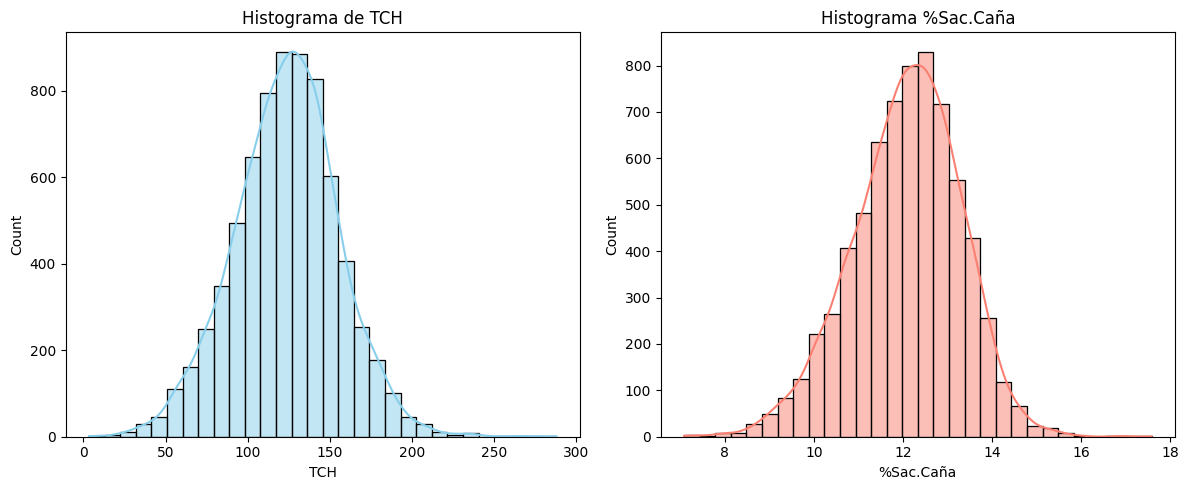

In [162]:
# Crear lienzo con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1
sns.histplot(df['TCH'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de TCH')

# Histograma 2
sns.histplot(df['%Sac.Caña'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histograma %Sac.Caña')

plt.tight_layout()
plt.show()

In [163]:
df_i_nulos

,TCH,TAH,KATRHM,TonUltCorte,Edad Ult Cos,Ton.Azucar
0,121.198333,14.341666,1434.823641,727.190,12.81,86.050
1,93.793103,10.157241,1182.180399,136.000,11.14,14.728
2,174.347087,17.629611,1857.192723,1436.620,12.32,145.268
3,136.790476,12.873333,1744.043640,143.630,9.79,13.517
4,113.068432,9.383002,1137.843039,512.200,11.53,42.505
...,...,...,...,...,...,...
20970,89.216708,8.519974,865.891720,710.165,12.39,67.819
20971,139.636640,13.970285,1412.903497,5968.070,12.48,597.090
20972,98.193181,9.896969,946.516661,129.615,13.17,13.064
20973,181.737639,14.910685,1701.055033,1139.495,11.76,93.490


In [164]:
x = df_i['Edad Ult Cos']
y = df_i['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.31e-51
Time:                        02:09:01   Log-Likelihood:                -34775.
No. Observations:                7148   AIC:                         6.955e+04
Df Residuals:                    7146   BIC:                         6.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           89.4102      2.287     39.096   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.31e-51
Time:                        02:09:01   Log-Likelihood:                -34775.
No. Observations:                7148   AIC:                         6.955e+04
Df Residuals:                    7146   BIC:                         6.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           89.4102      2.287     39.096      0.000      84.927      93.893
Edad Ult Cos     2.6593      0.176     15.130      0.000       2.315       3.004
==============================================================================
Omnibus:                       46.868   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.668
Skew:                          -0.076   Prob(JB):                     9.07e-15
Kurtosis:                       3.440   Cond. No.                         80.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
##Eliminar outliers de Edad ult cos

col = 'Edad Ult Cos'

low = df_i[col].quantile(0.01)   # percentil 1%
high = df_i[col].quantile(0.99)  # percentil 99%

df_filtrado = df_i[(df_i[col] >= low) & (df[col] <= high)]

In [165]:
df_filtrado.describe()

,TCH,TonUltCorte,Ton.Azucar,Evaporacion Ciclo,MicroZinc,Evaporacion 0-3,Edad Ult Cos,Radicion Solar 0-3,%Infest.Diatrea,M3 Riego,Area Neta,Vinaza,Radiacion Solar Ciclo
count,7004.000000,7004.000000,6898.000000,4386.000000,31.000000,4386.000000,7004.000000,4386.000000,2012.000000,7076.000000,7004.000000,1838.000000,4386.000000
mean,123.491119,1110.140481,117.156807,1906.105928,93.870968,443.188714,12.782915,435.366235,2.447628,27427.793231,8.820661,84901.547807,438.675148
std,29.415084,897.470925,97.540068,240.812597,13.826887,37.673404,1.747540,19.059752,1.333071,52015.365461,6.498726,55865.333030,16.513611
min,47.602102,8.610000,0.000000,1278.000000,60.000000,334.000000,8.480000,386.314000,0.491900,0.000000,0.075000,10500.000000,387.032000
25%,103.469237,413.986250,42.171250,1737.625000,100.000000,417.425000,11.830000,421.664000,1.376925,0.000000,3.640000,40365.000000,426.923000
50%,124.626511,882.160000,92.087000,1885.200000,100.000000,440.950000,12.350000,436.591000,2.189100,0.000000,7.485000,75035.000000,439.140000
75%,143.448769,1574.415000,167.691500,2050.525000,100.000000,465.000000,13.370000,448.784750,3.240925,34090.575000,12.370000,115342.500000,450.063250
max,198.368879,4454.205000,480.496000,2757.400000,100.000000,542.400000,20.860000,476.356000,6.292100,298382.400000,31.600000,271200.000000,473.572000


In [166]:
x = df_filtrado['Edad Ult Cos']
y = df_filtrado['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()


MissingDataError: exog contains inf or nans

In [52]:
df_TAH_nulos = df_i.dropna(subset=['TAH'])

In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tu variable independiente es 'Semanas_mad'
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_TAH_nulos[['TAH']])  # estandarizada
y = df_TAH_nulos['TCH']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo = sm.OLS(y, X_scaled).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 6.243e+04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:24:59   Log-Likelihood:                -87537.
No. Observations:               20786   AIC:                         1.751e+05
Df Residuals:                   20784   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.7271      0.113   1145.958      0.0

In [54]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tu variable independiente es 'Semanas_mad'
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_filtrado[['Edad Ult Cos']])  # estandarizada
y = df_filtrado['TCH']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo = sm.OLS(y, X_scaled).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2114.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:25:04   Log-Likelihood:                -99918.
No. Observations:               20612   AIC:                         1.998e+05
Df Residuals:                   20610   BIC:                         1.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.9191      0.215    604.907      0.0

In [55]:
modelo = LinearRegression()
modelo.fit(X_scaled, y)

LinearRegression()

In [56]:
y_pred=modelo.predict(X_scaled)

In [57]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y, modelo.predict(X_scaled))
print('Mean Squared Error:', MSE)

Mean Squared Error: 950.7061655242661


In [58]:
rmse= np.sqrt(metrics.mean_squared_error(y, modelo.predict(X_scaled)))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 30.833523404312167


In [59]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, modelo.predict(X_scaled))))

Root Mean Squared Error: 30.833523404312167


Regresión múltiple

In [181]:
df_filt_nulos

,TCH,TonUltCorte,Ton.Azucar,Evaporacion Ciclo,MicroZinc,Evaporacion 0-3,Edad Ult Cos,Radicion Solar 0-3,%Infest.Diatrea,M3 Riego,Area Neta,Vinaza,Radiacion Solar Ciclo
14120,136.083013,1417.985,180.761,2224.7,100.0,446.4,15.24,434.840,1.1821,122239.08,10.42,62520.0,436.044
14469,138.090776,1422.335,142.353,2109.4,100.0,499.2,12.71,448.921,3.9110,94888.80,10.30,61800.0,450.612
16047,137.268859,1564.865,170.733,2070.4,100.0,456.4,12.75,426.375,4.1825,138301.20,11.40,71860.0,439.025
20270,76.963932,1088.270,137.313,2109.5,100.0,441.1,12.62,437.142,2.6582,93052.80,14.14,181640.0,467.575
20282,140.397801,2362.895,278.239,2070.7,100.0,456.0,12.39,449.765,0.8522,195544.80,16.83,201020.0,472.367


In [182]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df_i[['Evaporacion Ciclo','TonUltCorte','Vinaza']]  # Variables predictoras
y = df_i["TCH"]  # Variable objetivo

In [202]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df_filt_nulos[['Evaporacion Ciclo']]  # Variables predictoras
y = df_filt_nulos["TCH"]  # Variable objetivo

In [203]:
### Splitting Dataset ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 42)

In [204]:
## escalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:
# Agregar término de sesgo para regresión lineal
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled, has_constant='add')
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred_train = lin_model.predict(X_train_scaled)
y_pred_test = lin_model.predict(X_test_scaled)

In [206]:
MSE_Train= metrics.mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error:', MSE_Train)

Mean Squared Error: 740.1097195550457


In [207]:
mse_Test = metrics.mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse_Test)

Mean Squared Error: 763.1712144831156


In [208]:
rmse_train= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test= np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [209]:
print ("RSME Train:",rmse_train)
print ("RSME Test:",rmse_test)

RSME Train: 27.204957628253084
RSME Test: 27.625553650254968


In [234]:
lin_model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.868
Method:                 Least Squares   F-statistic:                   0.07089
Date:                Wed, 10 Sep 2025   Prob (F-statistic):              0.834
Time:                        02:27:21   Log-Likelihood:                -14.167
No. Observations:                   3   AIC:                             32.33
Df Residuals:                       1   BIC:                             30.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.7719     27.205      4.292      0.146    -228.900     462.444
x1             7.2431     27.205      0.266      0.834    -338.429     352.915
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.119
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.395
Skew:                          -0.476   Prob(JB):                        0.821
Kurtosis:                       1.500   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Validación supuesto

Modelo Polinomial

In [ ]:
X_poly = np.column_stack((df_filtrado["TonUltCorte"]**2, df_filtrado["Edad Ult Cos"]**2, df_filtrado["Luvias 9 -FC"]**2))
X_poly = sm.add_constant(X_poly)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model1 = sm.OLS(df_filtrado["TCH"], X_poly).fit()
y_pred_poly_sm1 = poly_model1.predict(X_poly)

In [ ]:
print(poly_model1.summary())